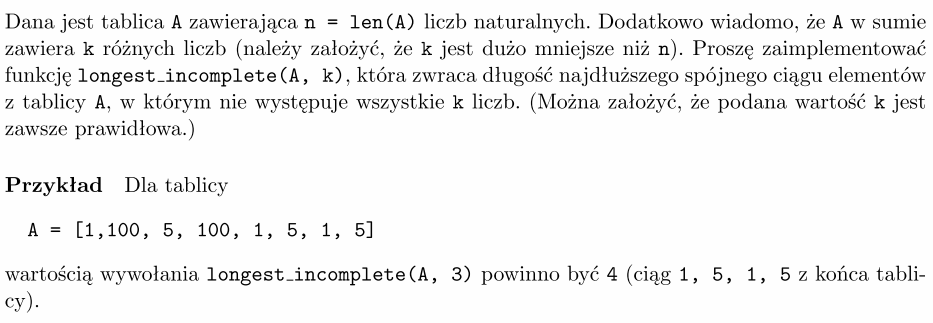

### Opis algorytmu

##### Wstępne przemyślenia

Ponieważ liczby naturalne w tablicy mogą być bardzo duże, nie opłaca nam się tworzyć tablicy liczników o rozmiarze równym największej z nich, bo sam proces tworzenia takiej tablicy (a dokł. jej inicjalizacji, która jest zawsze przeprowadzana w Pythonie), zajmie zbyt dużo czasu. Dużo lepiej jest utworzyć tablicę, w której będziemy trzymać posortowane unikalne wartości z tablicy $ A $, których wiemy że jest $ k $ (gdzie $ k \ll n $), a w drugiej tablicy $ k $-elementowej umieścimy liczniki wystąpień odpowiednich wartości. Konieczne będzie użycie wyszukiwania binarnego, w celu uzyskania dostępu do odpowiedniej wartości licznika. Tak naprawę to, co robimy, jest w pewnym sensie imitacją hash mapy (słownika), ponieważ daje nam możliwość otrzymania odpowiednio zapisanej wartości licznika pod "kluczem", którym jest dana liczba. Oczywiście złożoność każdego dostępu do wartości licznika wynosi w tej sytuacji $ O(log(k)) $, więc jest większa niż dostęp do słownika w stałym czasie $ O(1) $, jednakże ze słowników nie wolno nam korzystać.

##### Plan działania

W pierwszej kolejności przechodzimy liniowo po tablicy $ A $ i dla każdej z wartości sprawdzamy, czy występuje ona w tablicy wartości unikalnych, przy pomocy Binary Searcha. Jeżeli dana wartość nie znajduje się w tej tablicy, umieszczamy ją w odpowiednim miejscu (nie będziemy za każdym razem sortować tej tablicy, a konieczne jest utrzymywanie jej ciągle posortowanej, żeby działało wyszukiwanie binarne), a jeżeli wartość już występuje w tablicy, należy przejść do sprawdzania kolejnej. <br>
W kolejnym kroku musimy zauważyć, że skoro szukamy najdłuższego spójnego podciągu, który zawiera mniej niż $ k $ różnych liczb, to musi on zawierać dokładnie $ k - 1 $ liczb, bo wtedy mamy najdłuższy podciąg (Chyba, że cała tablica spełnia warunek, jeżeli podana wartość parametru $ k $ jest wyższa niż liczba unikalnych wartości w tablicy $ A $, jednakże nie powinno się to zdarzyć, bo mamy powiedziane, że można założyć, że wartość $ k $ jest podana poprawnie. My tego nie zakładamy i robimy ogólny przypadek.). <br>
Wiedząc już to wszystko, możemy przejść do szukania najdłuższego spójnego podciągu, który spełnia powyższe założenia. Najłatwiej zacząć od wyznaczenia pierwszego podciągu o liczbie różnych elementów równej $ k - 1 $, zgodnego z naszymi założeniami, ponieważ wówczas nie musimy badać, czy liczba różnych elementów kolejnych podciągów wynosi wciąż $ k - 1 $. W kolejnej pętli wystarczy wówczas odpowiednio przesuwać wskaźnik początku i końca podciągu tak, aby za każdym razem wskazywały one na podciąg, który ma dokładnie $ k - 1 $ różnych liczb. Za każdym razem, przesuwając pierwszy wskaźnik (już w drugiej pętli, w której poszukujemy podciągu), musimy sprawdzać, czy wartość, na której się znajdujemy, jest wartością nową w bieżącym podciągu, czy już się wcześniej pojawiła. W tym miejscu bardzo nam się przydaje tablica z licznikami wystąpień danych wartości w podciągu. Wystarczy ponownie wykorzystać wyszukiwanie binarne, w celu wyznaczenia indeksu bieżącej wartości, a przy pomocy tego indesku, pobrania wartości odpowiedniego licznika z tablicy liczników. Jeżeli po zwiększeniu o 1 wartości tego licznika, wartość ta wynosi dokładnie 1, oznacza to, że dodaliśmy nową wartość do podciągu, więc z naszego podciągu musimy usunąć jakąś poprzednią wartość, aby liczba różnych elementów pozostała niezmieniona. W tym celu, sprawdzamy w pętli wartość licznika dla elementu, na którym znajduje się obecnie drugi wskaźnik. Jeżeli wartość ta jest dodatnia, przesuwamy wskaźnik w prawo, aby się jej pozbyć i jednocześnie zmniejszamy odpowiadający jej licznik. Natomiast, gdy wartość licznika dla elementu, na którym się znajdzie drugi wskaźnik, osiągnie wartość równą 0, oznacza to, że odrzuciliśmy z przedziału ostatnie powtórzenie danej wartości, a stąd wynika, że nasz przedział ma teraz o 1 element unikalny mniej, czyli mamy to, co chcieliśmy (przywróciliśmy liczbę unikalnych wartości w przedziale do $ k - 1 $). Możemy więc zakończyć przesuwanie drugiego wskaźnika i zacząć ponownie poruszać się piewszym wskaźnikiem. Oczywiście, jeżeli przesuwamy prawy wskaźnik na wartość, która już była w poprzednim podciągu, liczba unikalnych wartości w podciągu pozostaje taka sama, więc wydłuża nam się przedział, a zatem konieczne jest sprawdzenie, czy przypadkiem nie jest to najdłuższy dotychczas przedział. Powyższą procedurę powtarzamy do momentu, w którym pierwszy wskaźnik dojdzie do końca tablicy. Na koniec zwracamy długość najdłuższego znalezionego podciągu.

##### Analiza złożoności

$ O(n \cdot log(k) + k^2) $ - Przejście liniowe po tablicy $ A $ i odfiltrowanie wartości unikatowych. Dla każdej spośród $ n $ wartości wywołujemy wyszukiwanie binarne na tablicy o rozmiarze max. $ k $, więc złożoność jest $ O(n \cdot log(k)) $ dla samego sprawdzania, czy dana wartość jest już zapisana. Dodatkowo $ k $ unikatowych wartości musimy wstawić w odpowiednie miejsce tej tablicy, co w najgorszym przypadku zajmie nam czas $ O(k) $ dla każdej z wartości, a to daje nam sumarycznie $ O(k^2) $ na wstawianie unikatów, <br>
$ O(n \cdot log(k)) $ - Sumarycznie przechodzimy obydwoma wskaźnikami liniowo po tablicy $ A $ (o długości $ n $) i po każdym przesunięciu każdego ze wskaźników używamy Binary Searcha. Daje to sumaryczną złożoność w notacji dużego O równą $ O(n \cdot log(k)) $ (po usunięciu stałych i niedominujących składników). <br>
RAZEM: <br>
$ O(n \cdot log(k) + k^2) $ - sumaryczna złożoność (przy czym wiemy, że $ k \ll n $, więc złożoność ta jest bliska złożoności $ O(n) $).

### Implementacja algorytmu

In [38]:
def longest_incomplete(A, k):
    if k < 2: return 0
    # Store unique values in an array (they must be sorted)
    unique = []
    for val in A:
        idx = binary_search(unique, val)
        if idx < 0:
            insert_element(unique, val)
            
    # If we have less unique values than a value of k, the whole
    # array fulfills conditions
    if len(unique) < k: return len(A)
    
    # Create counters array
    counters = [0] * len(unique)
    # Find the first subsequence of k-1 unique values
    # (as we look for the longest subsequence, we will always
    # take k-1 values)
    remaining = k - 1
    i = 0
    while i < len(A) and remaining > 0:
        idx = binary_search(unique, A[i])
        counters[idx] += 1
        if counters[idx] == 1:
            if remaining - 1 < 0:
                break
            remaining -= 1
        i += 1
        
    # Look for a longest subsequence of a number of unique values
    # not greater than k (this will usually be a subsequence
    # of k-1 unique values)
    max_length = i
    j = 0
    while i < len(A):
        idx_i = binary_search(unique, A[i])
        # If we found a new value, we have to advance a j pointer till
        # we drop one of values
        counters[idx_i] += 1
        if counters[idx_i] == 1:
            while j <= i:
                idx_j = binary_search(unique, A[j])
                counters[idx_j] -= 1
                j += 1
                if counters[idx_j] == 0:
                    break
        else:
            curr_length = i - j + 1
            if curr_length > max_length:
                max_length = curr_length
        i += 1

    return max_length


def binary_search(arr, el):
    left_idx = 0
    right_idx = len(arr) - 1

    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if el > arr[mid_idx]:
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1

    return left_idx if left_idx < len(arr) and arr[left_idx] == el else -1


def insert_element(arr, val: 'inserted value'):
    arr.append(val)
    if len(arr) > 1:
        # Move all elements that are greater than a value inserted to the right
        idx = len(arr) - 1
        while idx > 0 and arr[idx - 1] > val:
            arr[idx] = arr[idx - 1]
            idx -= 1
        # Place our value on the final position
        arr[idx] = val

###### Kilka testów

In [42]:
A = [1, 100, 5, 100, 1, 5, 1, 5]
k = 3

print(longest_incomplete(A, k))

4


In [40]:
A = [1, 100, 5, 1, 5, 1, 1, 5, 1, 100, 1, 5, 1, 5, 1, 1, 1]
k = 3

print(longest_incomplete(A, k))
print(longest_incomplete(A, 4))  # Takes the whole array
print(longest_incomplete(A, 2))
print(longest_incomplete(A, 1))  # Returns 0 as the only one possibility for a value lower than 1 is 0
print(longest_incomplete(A, 2131321))
print(longest_incomplete(A, -4821904))

7
17
3
0
17
0
